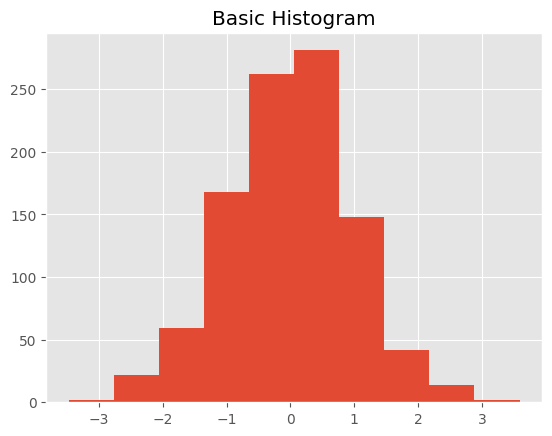

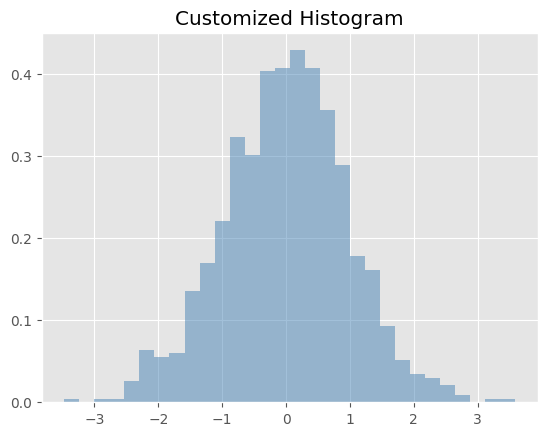

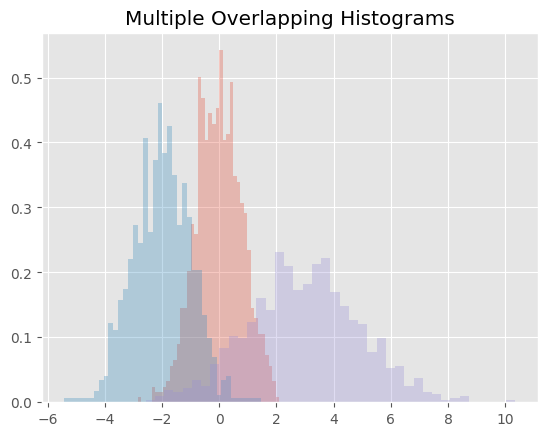

Bin counts: [ 24 227 543 190  16]
Bin edges: [-3.47179051 -2.05980211 -0.6478137   0.76417471  2.17616312  3.58815153]


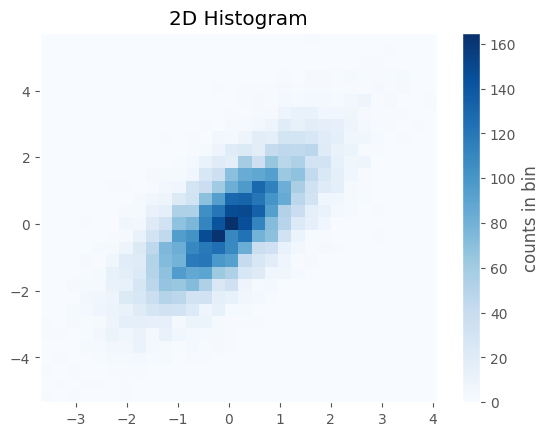

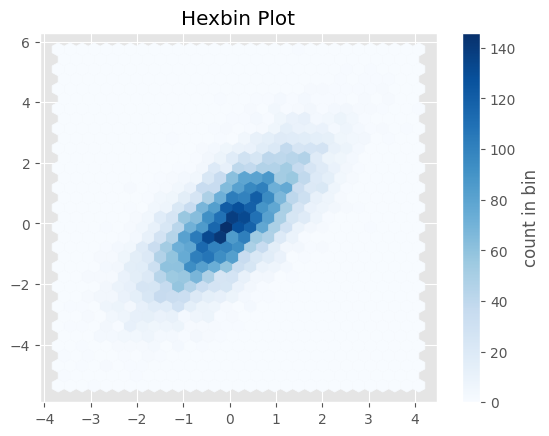

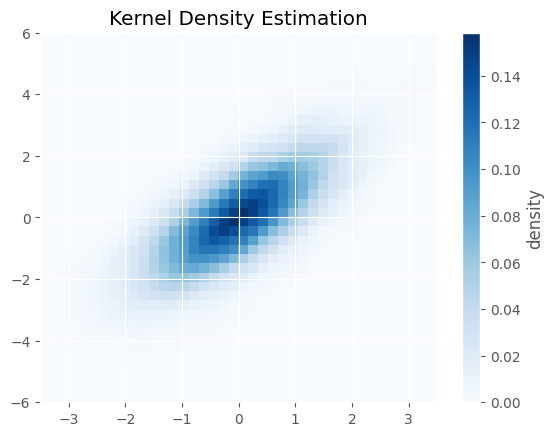

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Set plotting style to seaborn-white for a cleaner look
plt.style.use('ggplot')

# -------------------
# 1. SIMPLE HISTOGRAM
# -------------------

# Generate 1000 random data points from a standard normal distribution (mean=0, std=1)
data = np.random.randn(1000)

# Plot a basic histogram of the data
plt.hist(data)  # Default bin size and options
plt.title("Basic Histogram")
plt.show()

# -------------------------
# 2. CUSTOMIZED HISTOGRAM
# -------------------------

# Plot histogram with customized appearance
plt.hist(data, bins=30, density=True, alpha=0.5,       # More bins, normalize to density, make bars semi-transparent
         histtype='stepfilled', color='steelblue',     # Use stepfilled style with steelblue color
         edgecolor='none')                             # No edge color for bars
plt.title("Customized Histogram")
plt.show()

# -------------------------------
# 3. COMPARE MULTIPLE HISTOGRAMS
# -------------------------------

# Generate three datasets from different normal distributions
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

# Set common histogram display parameters
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

# Plot all three histograms on the same plot
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.title("Multiple Overlapping Histograms")
plt.show()

# ----------------------------------------
# 4. GET HISTOGRAM DATA WITHOUT PLOTTING
# ----------------------------------------

# Get histogram bin counts and edges (5 bins)
counts, bin_edges = np.histogram(data, bins=5)
print("Bin counts:", counts)        # e.g., [ 12 190 468 301  29]
print("Bin edges:", bin_edges)      # Edges of the 5 bins

# -------------------------------
# 5. TWO-DIMENSIONAL HISTOGRAM
# -------------------------------

# Generate 2D data from a multivariate normal distribution
mean = [0, 0]
cov = [[1, 1], [1, 2]]  # Covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 10000).T  # Transpose to get separate x and y arrays

# Plot 2D histogram with 30x30 bins and blue colormap
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()            # Add colorbar to indicate counts
cb.set_label('counts in bin')
plt.title("2D Histogram")
plt.show()

# Get raw 2D histogram data without plotting
counts_2d, xedges, yedges = np.histogram2d(x, y, bins=30)

# -------------------------------
# 6. HEXAGONAL BINNING PLOT
# -------------------------------

# Use hexagons instead of squares to bin 2D data
plt.hexbin(x, y, gridsize=30, cmap='Blues')  # gridsize defines hexagon resolution
cb = plt.colorbar(label='count in bin')      # Add labeled colorbar
plt.title("Hexbin Plot")
plt.show()

# -------------------------------
# 7. KERNEL DENSITY ESTIMATION
# -------------------------------

# Stack x and y into a single 2D array for KDE input: shape = [2, N]
data_kde = np.vstack([x, y])

# Create KDE object
kde = gaussian_kde(data_kde)  # Fits the distribution based on sample density

# Define a grid of x and y values for evaluating KDE
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)  # 2D evaluation grid

# Evaluate KDE on the grid
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))  # Flatten grid for KDE

# Display KDE as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")
plt.title("Kernel Density Estimation")
plt.show()

# --------------------
# SUMMARY:
# --------------------
# - We started with 1D histograms using plt.hist and added custom styles.
# - Compared multiple distributions by plotting overlapping histograms.
# - Used np.histogram for raw bin data.
# - Used plt.hist2d and plt.hexbin for 2D histograms and hexbin plots.
# - Finally, we used Gaussian KDE to estimate a smooth 2D density.
# - KDE allows visualizing data distributions smoothly using probability density.
